<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/ML__project__clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
 !pip install kneed

In [5]:
df = pd.read_csv('/content/drive/My Drive/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

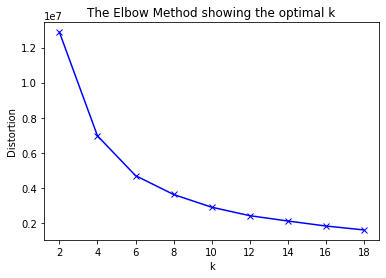

In [7]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = df.values
stds = StandardScaler()
X = stds.fit_transform(X)
# k means determine k
distortions = []
K = range(2,20,2)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()




In [9]:
kn = KneeLocator(K, distortions, S=1.0, curve='convex', direction='decreasing')
print(f'Optimal number of clusters {kn.knee}')

Optimal number of clusters 6


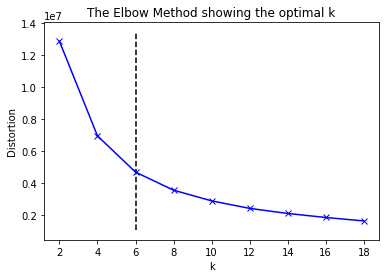

In [10]:

plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [0]:
kmeanModel = KMeans(n_clusters=kn.knee)
kmeanModel.fit(X)
labels = kmeanModel.predict(X)

In [12]:
labels

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

In [0]:
df['Cluster'] = labels

# Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

In [0]:
df["DATE"] = pd.to_datetime(df['DATE'], unit = "s").dt.date

In [48]:
df['Cluster'].value_counts()

3    8721
0    7812
2    7138
5    6647
1    6252
4    4696
Name: Cluster, dtype: int64

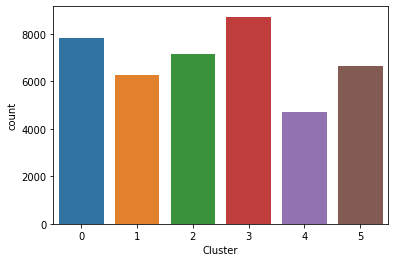

In [55]:
sns.countplot(x='Cluster',data=df)

In [0]:
stocks = [col for col in df[df['Cluster'] ==4].columns[1:]]

In [16]:
stocks[0]

'SP500'

In [0]:
df = df.set_index('DATE')

Stock Price Trend for SP500 in cluster:2




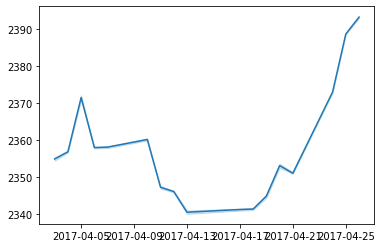

Stock Price Trend for SP500 in cluster:3




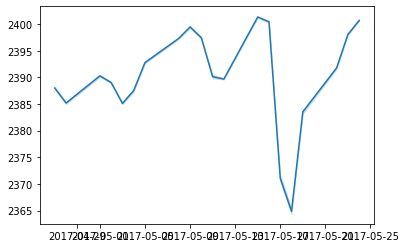

Stock Price Trend for SP500 in cluster:0




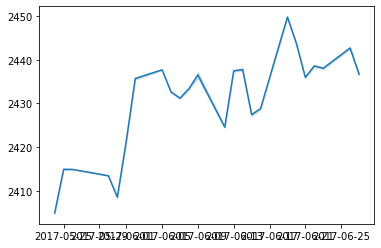

Stock Price Trend for SP500 in cluster:4




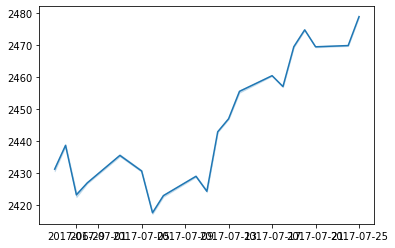

Stock Price Trend for SP500 in cluster:1




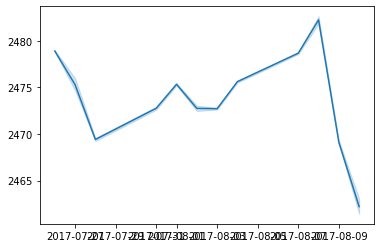

Stock Price Trend for SP500 in cluster:5




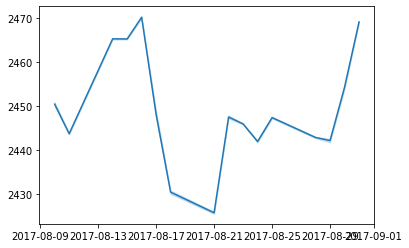

In [28]:
for i in df.Cluster.unique():
  print(f'Stock Price Trend for {stocks[0]} in cluster:{i}')
  print('\n')
  df1= df[df['Cluster']==i][stocks[0]].copy()
  sns.lineplot(data =df1)
  plt.show()
  

Stock Price Trend for NYSE.ZTS in cluster:2




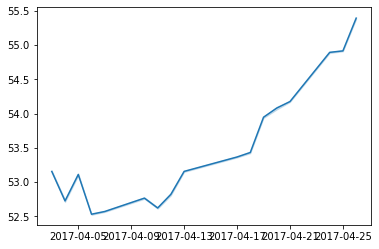

Stock Price Trend for NYSE.ZTS in cluster:3




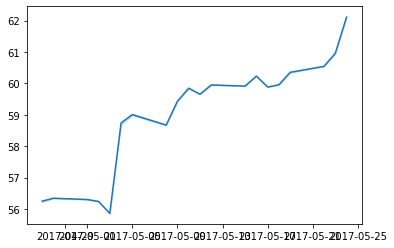

Stock Price Trend for NYSE.ZTS in cluster:0




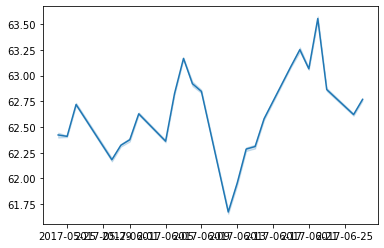

Stock Price Trend for NYSE.ZTS in cluster:4




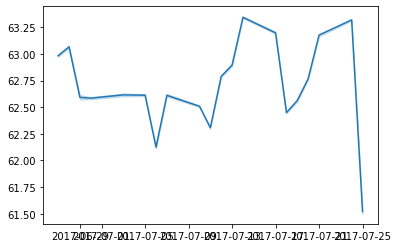

Stock Price Trend for NYSE.ZTS in cluster:1




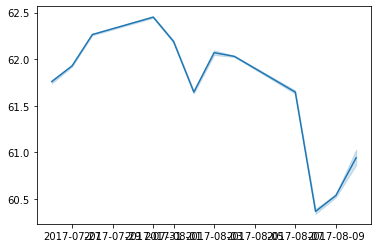

Stock Price Trend for NYSE.ZTS in cluster:5




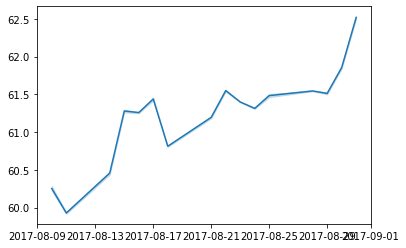

In [30]:
for i in df.Cluster.unique():
  print(f'Stock Price Trend for {stocks[-2]} in cluster:{i}')
  print('\n')
  df1= df[df['Cluster']==i][stocks[-2]].copy()
  sns.lineplot(data =df1)
  plt.show()